# **Project Name**    - Health Insurance Cross Sell Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name              -** Dhanunjaya M

# **Project Summary -**

Write the summary here within 500-600 words.

Our client, an insurance company, needs help building a model to predict whether its past-year health insurance policyholders will be interested in purchasing vehicle insurance from the company.

Insurance policies provide a guarantee of compensation for specified losses, damages, illnesses, or death in return for regular premium payments. The premium amount is determined based on the risk of such events occurring. By sharing the risk among multiple customers, the insurance company can afford to provide compensation to those who need it.

For example, if 100 customers pay a premium of 5000 each year for a health insurance cover of 200,000, only a few of them may get hospitalized in that year, and the insurance company will bear the cost of hospitalization up to 200,000 for those customers.

Similarly, vehicle insurance requires customers to pay a premium each year, and in the event of an accident, the insurance company provides compensation (sum assured) to the customer.

Predicting customer interest in vehicle insurance is crucial for the company to plan its communication strategy, optimize its business model, and increase revenue. The available information includes demographics (gender, age, region code type), vehicle details (age, damage), policy details (premium, sourcing channel), etc.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/Dhana009/health-insurance-project

# **Problem Statement**


**Write Problem Statement Here.**

Our task is to build a predictive model for our insurance client to determine whether their past-year policyholders would be interested in purchasing Vehicle Insurance from the company. To make this prediction, we have access to various data points, including customer demographics (gender, age, region code), vehicle details (vehicle age, damage), and policy-related information (premium, sourcing channel).

Using this data, we will develop a model that can accurately identify customers who are more likely to show interest in purchasing Vehicle Insurance. This model will enable our client to optimize their marketing and business strategies, offering targeted insurance policies to potential customers and maximizing revenue opportunities.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 14})
%matplotlib inline

### Dataset Loading

In [ ]:
# Load Dataset
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')


# reading data file
dir_path = '/content/drive/MyDrive/Almabetter/capstone projects/health/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
df = pd.read_csv(dir_path)

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
# Dataset First Look
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
shape_tuple = df.shape
print(f'The dataset has {shape_tuple[0]} rows and {shape_tuple[1]} columns')


The dataset has 381109 rows and 12 columns


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicates_count = df.duplicated().sum()
print(f'Number of duplicated rows are {duplicates_count}')


Number of duplicated rows are 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_vals = df.isna().sum()
print(missing_vals)


id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


<Axes: >

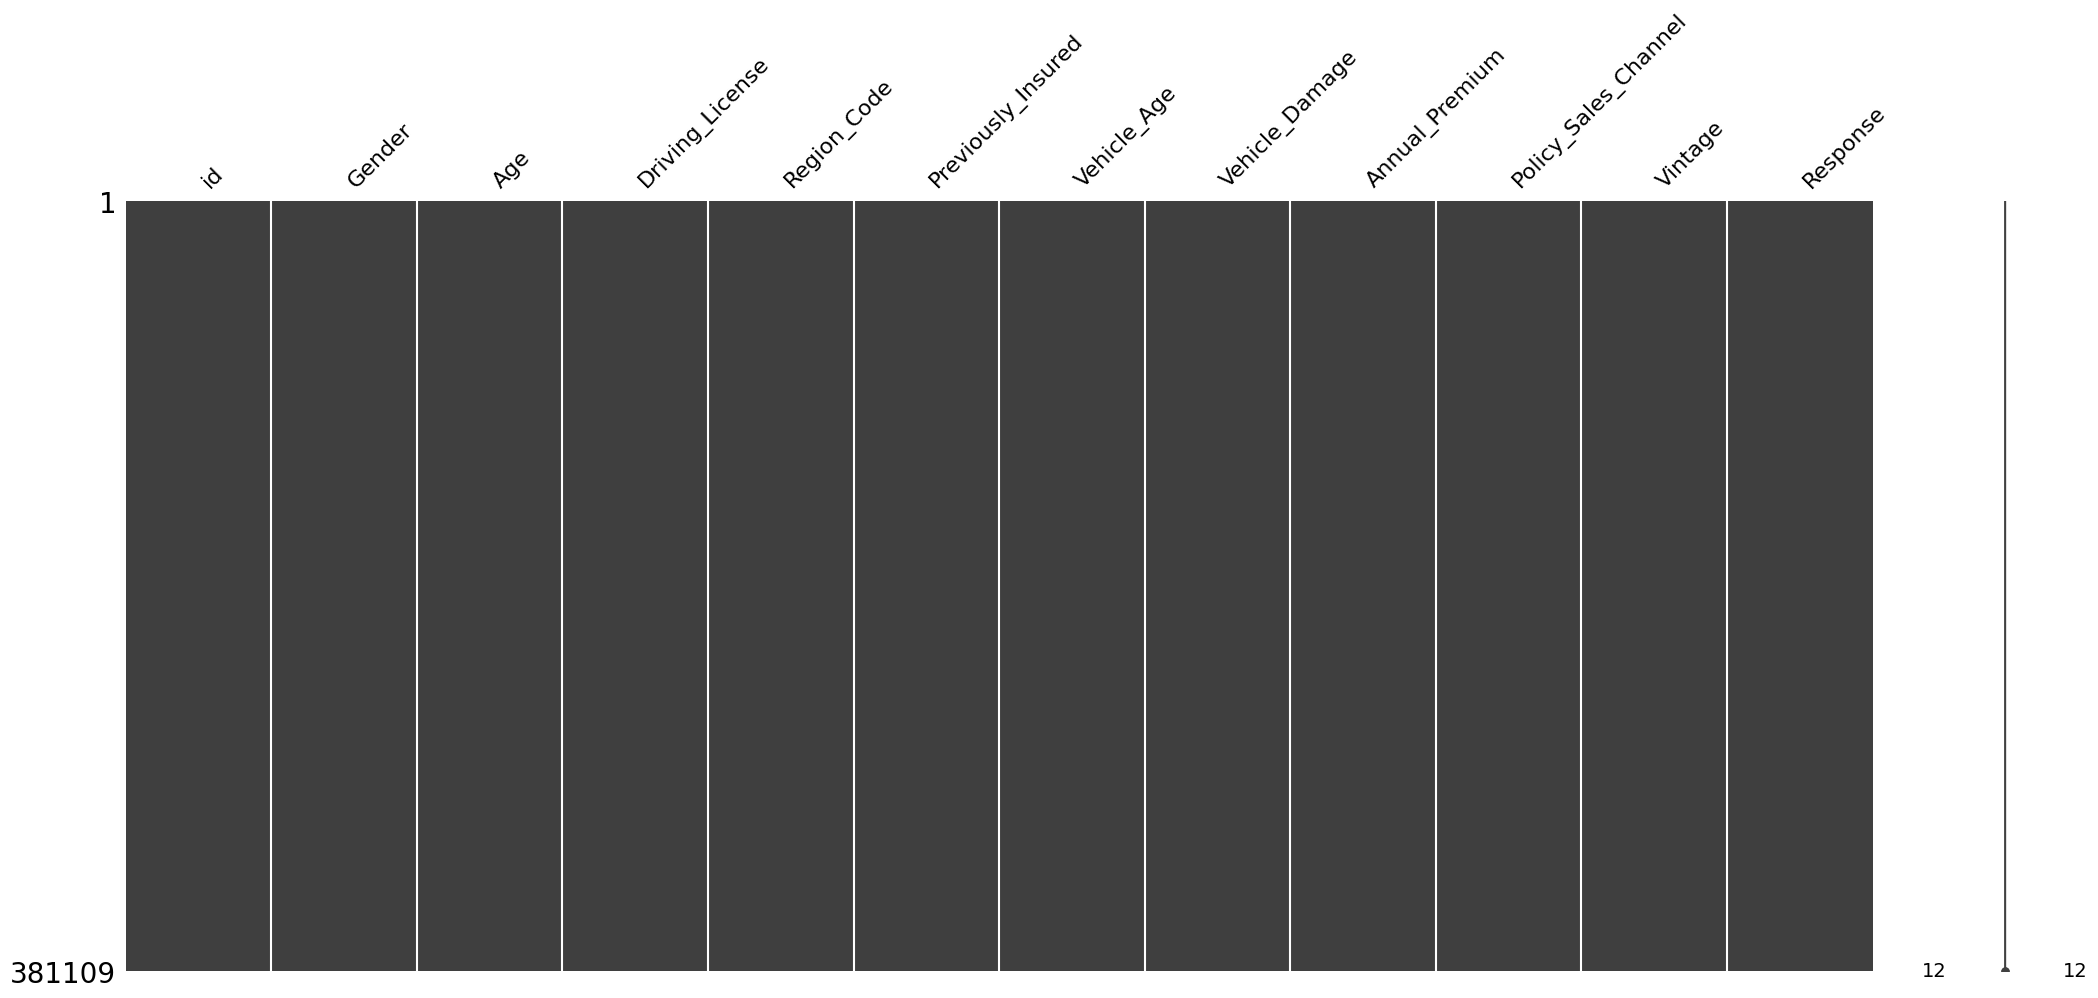

In [ ]:
# Visualizing the missing values
msno.matrix(df)

### What did you know about your dataset?

ID: A unique identifier for each data row.

Gender: The gender of the customer (Male or Female).

Age: The age of the customer in years.

Driving License: Indicates whether the customer possesses a driving license (Yes or No).

Region Code: A code representing the region of the customer.

Previously Insured: Indicates whether the customer had previous insurance (Yes or No).

Vehicle Age: The age of the vehicle owned by the customer.

Vehicle Damage: Indicates whether the vehicle was previously damaged (Yes or No).

Annual Premium: The yearly insurance premium amount the customer needs to pay.

Policy Sales Channel: The code representing the sales channel used to reach out to the customer (e.g., Agents, Mail, Phone, In Person, etc.).

Vintage: The number of days the customer has been associated with the company.

Response: Indicates whether the customer is interested in the insurance policy (No or Yes).

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
col = df.columns
print(col)

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')


In [ ]:
# Dataset Describe
df.describe(include = 'all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


### Variables Description

ID: A unique identifier for each data row.

Gender: The gender of the customer (Male or Female).

Age: The age of the customer in years.

Driving License: Indicates whether the customer possesses a driving license (Yes or No).

Region Code: A code representing the region of the customer.

Previously Insured: Indicates whether the customer had previous insurance (Yes or No).

Vehicle Age: The age of the vehicle owned by the customer.

Vehicle Damage: Indicates whether the vehicle was previously damaged (Yes or No).

Annual Premium: The yearly insurance premium amount the customer needs to pay.

Policy Sales Channel: The code representing the sales channel used to reach out to the customer (e.g., Agents, Mail, Phone, In Person, etc.).

Vintage: The number of days the customer has been associated with the company.

Response: Indicates whether the customer is interested in the insurance policy (No or Yes).

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable and list values whose count is less than 25
for col in df.columns:
    unique_vals = len(df[col].unique())
    print(f"The number of unique values in '{col}' column are: {unique_vals}")

    if unique_vals <= 3:
        unique_values = df[col].unique()
        print(f"Printing unique values of '{col}'")
        print('The values are:', unique_values)
        print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')


The number of unique values in 'id' column are: 381109
The number of unique values in 'Gender' column are: 2
Printing unique values of 'Gender'
The values are: ['Male' 'Female']
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The number of unique values in 'Age' column are: 66
The number of unique values in 'Driving_License' column are: 2
Printing unique values of 'Driving_License'
The values are: [1 0]
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The number of unique values in 'Region_Code' column are: 53
The number of unique values in 'Previously_Insured' column are: 2
Printing unique values of 'Previously_Insured'
The values are: [0 1]
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The number of unique values in 'Vehicle_Age' column are: 3
Printing unique values of 'Vehicle_Age'
The values are: ['> 2 Years' '1-2 Year' '< 1 Year']
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
The number of unique values in 'Vehicle_Damage' column are: 2
Printing unique values of 'Vehicle_Damage'
The values are: ['Yes' 'No']
>>>>>>>>>>>>>>>>>

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Having a copy of the dataframe (can be used if any manipulation on the original df is done)
copy_df = df.copy()

# Dropping the 'id' column
df.drop(['id'], axis=1, inplace=True)

# Converting 'Driving_License' & 'Previously_Insured' from 1, 0 to Yes and No using lambda function
df['Driving_License'] = df['Driving_License'].apply(lambda x: 'Yes' if x == 1 else 'No')
df['Previously_Insured'] = df['Previously_Insured'].apply(lambda x: 'Yes' if x == 1 else 'No')


### What all manipulations have you done and insights you found?

Removed the 'id' column from the dataset as it was considered irrelevant for the analysis.

Changed the values in the categorical columns 'Driving_License' and 'Previously_Insured' from 1 & 0 to more descriptive labels 'Yes' and 'No' respectively, aiming to enhance visualization.

Optimized memory usage by converting the data types of 'Region_Code', 'Annual_Premium', and 'Policy_Sales_Channel' columns from float to integer.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

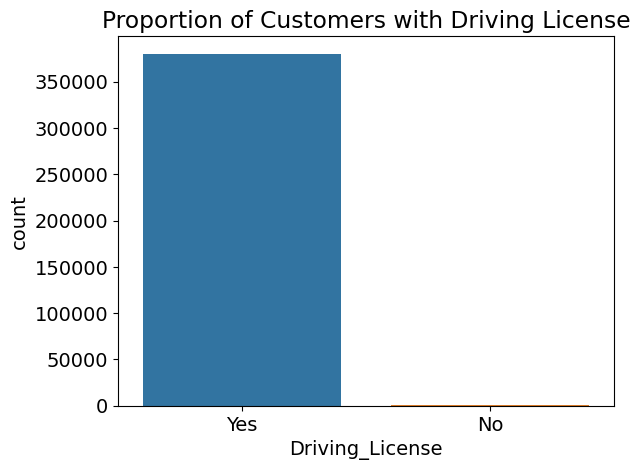

Yes    380297
No        812
Name: Driving_License, dtype: int64


In [ ]:
# Visualization code for Chart - 1

sns.countplot(x='Driving_License', data=df)

# Setting the chart title
plt.title('Proportion of Customers with Driving License')

# Displaying the chart
plt.show()

# Printing the counts for reference
print(df['Driving_License'].value_counts())


##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the proportion of customers with a driving license. It helps in comparing the counts of customers who own a driving license to those who do not.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a vast majority of customers (380,297) in the dataset own a driving license, while only a small number (812) do not have a driving license.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight could be valuable for businesses related to vehicles or insurance. They may target marketing efforts towards customers with driving licenses, as they form the majority. Additionally, businesses might consider initiatives to attract more customers who do not have a driving license, potentially leading to business growth and broader customer reach. However, the specific impact depends on the overall business strategy and goals.

#### Chart - 2

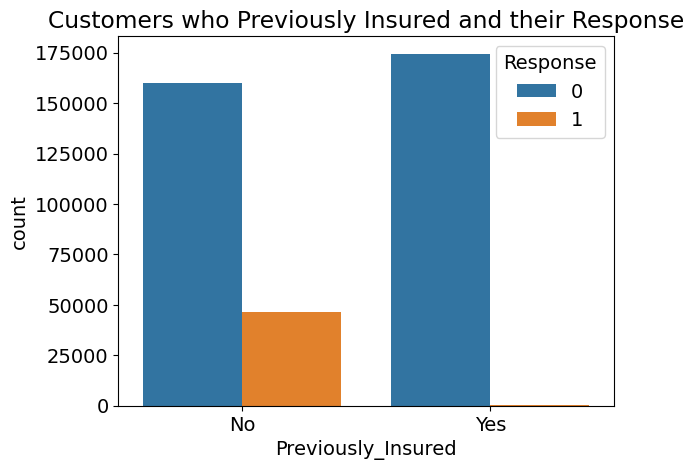

No     206481
Yes    174628
Name: Previously_Insured, dtype: int64


In [ ]:
# Visualization code for Chart - 2
sns.countplot(x='Previously_Insured', data=df, hue='Response')

# Setting the chart title
plt.title('Customers who Previously Insured and their Response')

# Displaying the chart
plt.show()

# Printing the counts for reference
print(df['Previously_Insured'].value_counts())


##### 1. Why did you pick the specific chart?

The count plot shows the number of customers who previously insured and their response to the policy (Yes or No).

##### 2. What is/are the insight(s) found from the chart?

The count plot shows the number of customers who previously insured and their response to the policy (Yes or No).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Targeting marketing efforts towards customers who have not insured previously may lead to increased policy sales and growth opportunities

#### Chart - 3

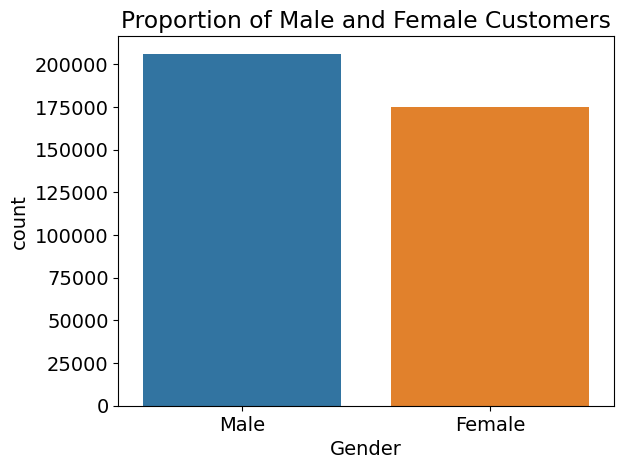

Male      206089
Female    175020
Name: Gender, dtype: int64


In [ ]:
# Visualization code for Chart - 3
sns.countplot(x='Gender', data=df)

# Setting the chart title
plt.title('Proportion of Male and Female Customers')

# Displaying the chart
plt.show()

# Printing the counts for reference
print(df['Gender'].value_counts())


##### 1. Why did you pick the specific chart?

The count plot represents the proportion of male and female customers in the dataset.

##### 2. What is/are the insight(s) found from the chart?

there are 206089 Male customers and 175020 Female customers

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart helps us understand the gender distribution of customers. This insight could be valuable for businesses to tailor marketing strategies based on the predominant gender in their customer base, leading to more targeted and effective campaigns.

#### Chart - *4*


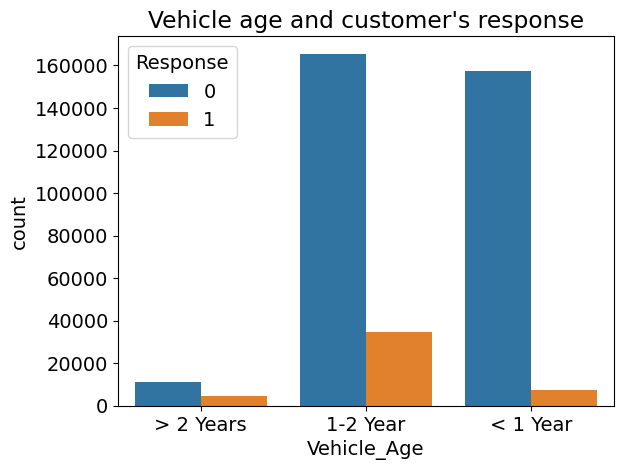

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


In [ ]:
# Chart - 4 visualization code

sns.countplot(x='Vehicle_Age', data=df, hue = 'Response')

# setting chart title
plt.title('Vehicle age and customer\'s response')

# display chart
plt.show()

# printing the counts for reference
print(df.Vehicle_Age.value_counts())

##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

It is observed that most of the customers have a vehicle age of 1-2 years.

Ratio-wise, customers with a vehicle age greater than 2 years show a higher interest in buying a policy.

The majority of the customers in the dataset have their vehicle age falling in the 1-2 years range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customers with a vehicle age greater than 2 years display a higher interest in buying a policy.

#### Chart - 5

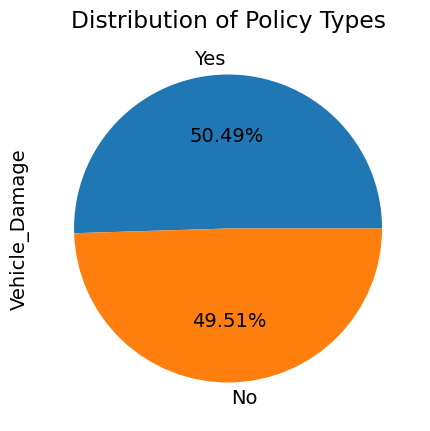

In [ ]:
#### Chart - 5

# Chart - 5 visualization code
counts = df['Vehicle_Damage'].value_counts()
plt.rcParams['figure.figsize'] = (5, 5)

# Setting pictdistance to 0.6 displays values inside the chart; if set to more than 1, values display outside the chart.
counts.plot(kind='pie', autopct='%1.2f%%', pctdistance=0.6)

# Setting column chart title
plt.title("Distribution of Policy Types")
plt.show()


##### 1. Why did you pick the specific chart?

Pie charts were chosen for easy interpretation and understanding of the share of policy types in percentage.

##### 2. What is/are the insight(s) found from the chart?

It is observed that the distribution of policy types is displayed in the pie chart, providing a clear view of each policy type's proportion.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights will aid in understanding the popularity of different policy types, which can be utilized to tailor marketing strategies and potentially lead to positive business impact.

#### Chart - 6


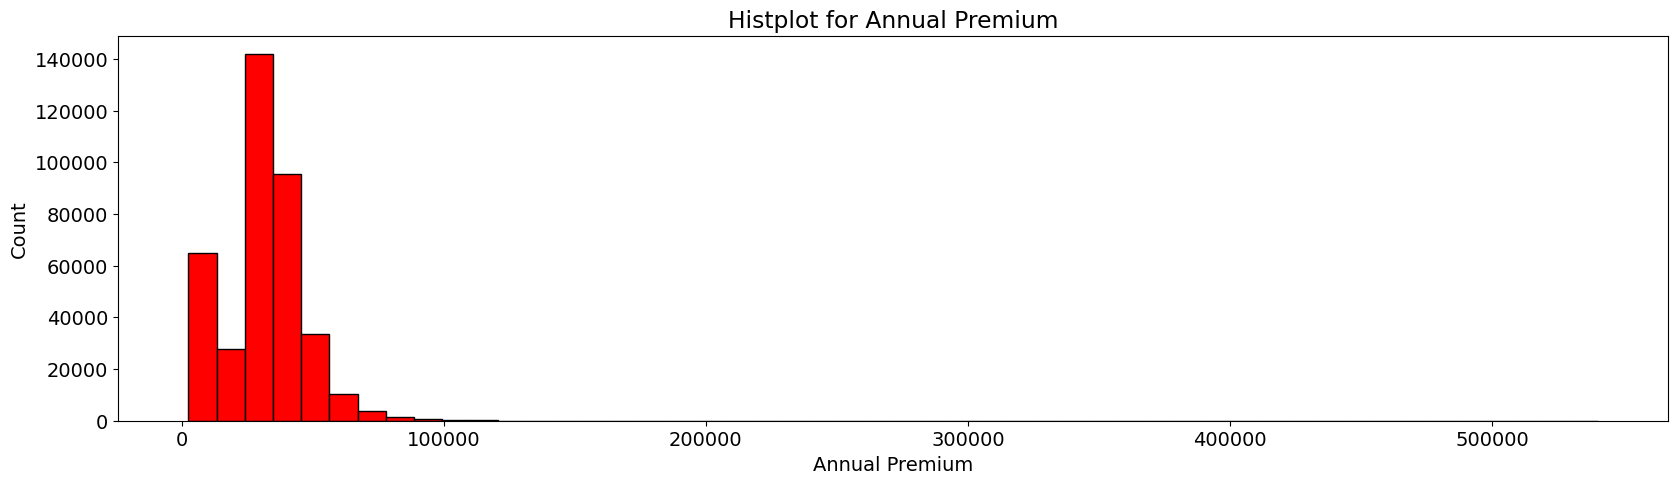

In [ ]:
# Chart - 6 visualization code
plt.rcParams['figure.figsize'] = (20, 5)
plt.hist(df['Annual_Premium'], bins=50, color='red', edgecolor='black')

plt.xlabel('Annual Premium')
plt.ylabel('Count')
plt.title('Histplot for Annual Premium')
plt.show()


##### 1. Why did you pick the specific chart?

The histogram chart is selected to visualize the distribution of annual premiums.

##### 2. What is/are the insight(s) found from the chart?

The majority of the annual premiums fall within the range of 5000 to 100000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are some premiums that are above 100000, which might indicate high-priced policies that could be less attractive to potential customers

#### Chart - 7


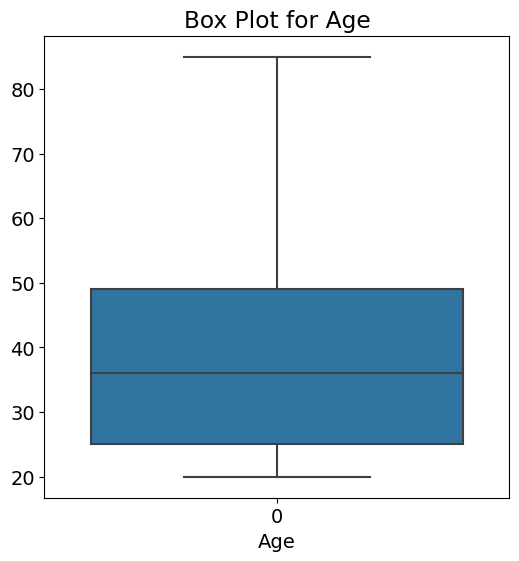

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(6, 6))
sns.boxplot(df['Age'])

plt.title('Box Plot for Age')
plt.xlabel('Age')
plt.show()


##### 1. Why did you pick the specific chart?

A box plot chart is chosen to visualize the distribution of age data and identify any outliers.

##### 2. What is/are the insight(s) found from the chart?

There are no outliers in the age column, and most customers belong to the age group of 25-48.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No outliers in the age column indicate a relatively consistent age distribution, which may not directly lead to negative growth.

#### Chart - 8

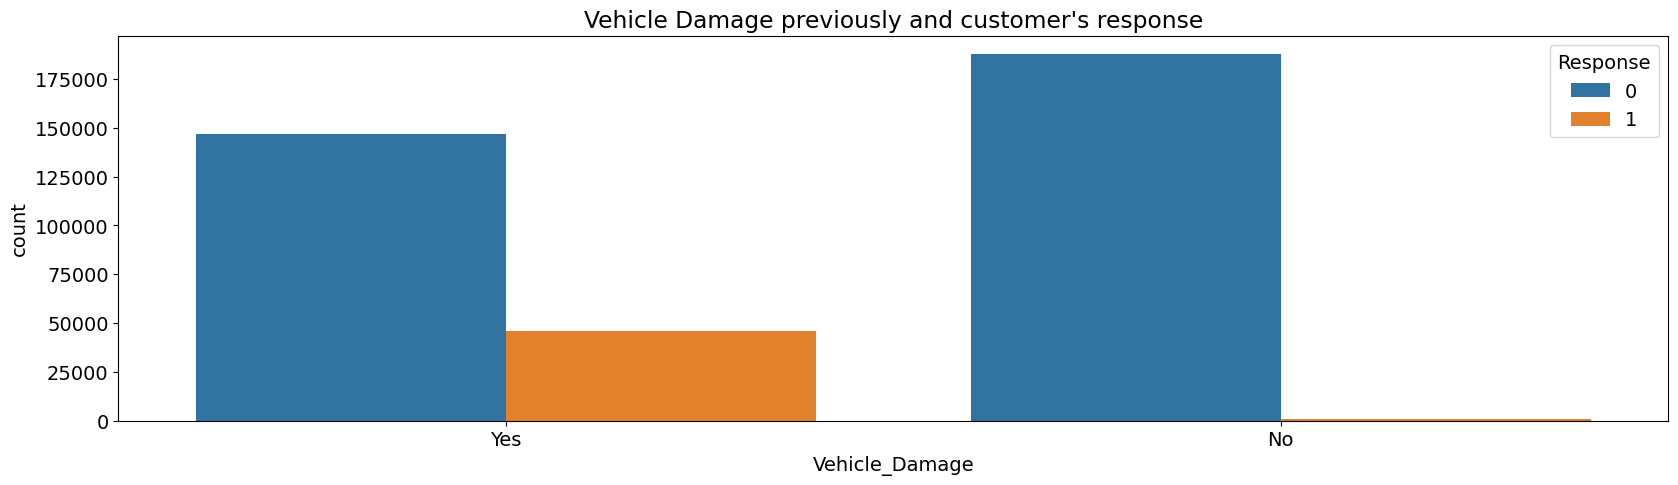

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


In [ ]:
# Chart - 8 visualization code
sns.countplot(x='Vehicle_Damage', data=df, hue='Response')

plt.title("Vehicle Damage previously and customer's response")
plt.show()

# Printing the counts for reference
print(df['Vehicle_Damage'].value_counts())


##### 1. Why did you pick the specific chart?

A count plot is chosen to display the count of customers who previously had vehicle damage and their response to buying a new policy.

##### 2. What is/are the insight(s) found from the chart?

Customers who had their vehicle damaged previously show a higher interest in buying new policies compared to customers who did not have vehicle damage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The observation that customers who did not have vehicle damage are less interested in buying policies might indicate a potential challenge in attracting these customers.

#### Chart - 9

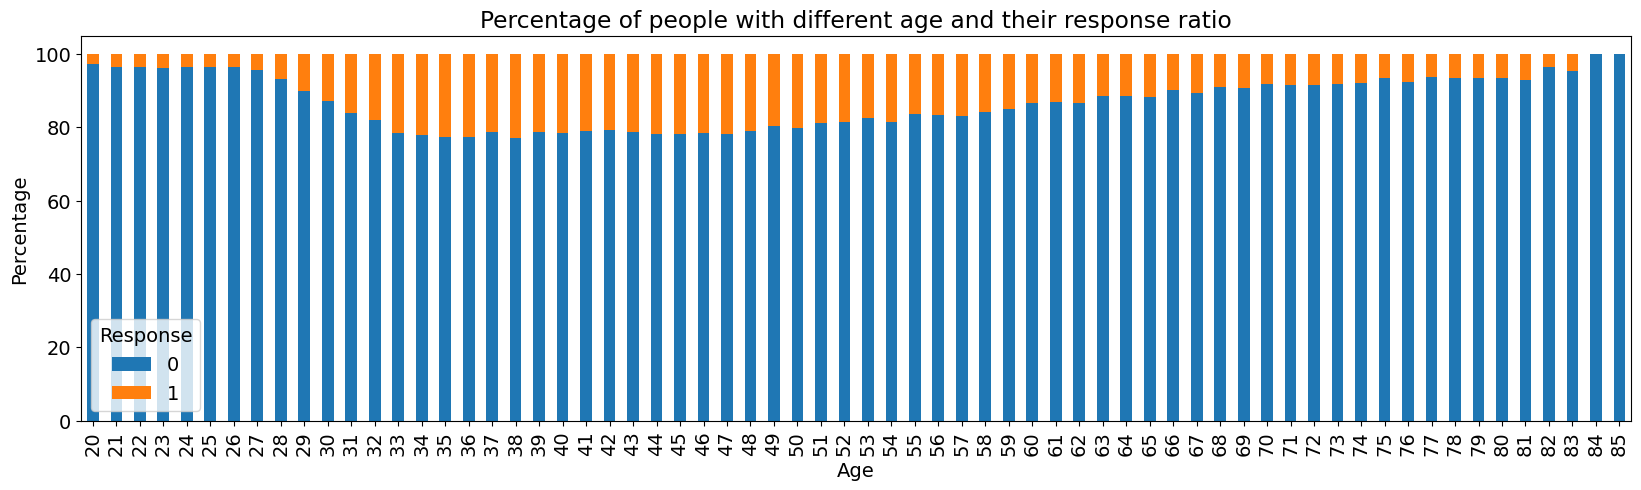

In [ ]:
# Chart - 9 visualization code
age_response = df.groupby(['Age', 'Response']).size().unstack()
total_counts = age_response.sum(axis=1)
age_response_ratios = age_response.div(total_counts, axis=0) * 100

# Create a stacked bar chart
age_response_ratios.plot(kind='bar', stacked=True)
plt.title('Percentage of people with different age and their response ratio')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.legend(title='Response')
plt.show()



##### 1. Why did you pick the specific chart?

A stacked bar plot is used to show the percentage of people with different ages and their response ratios.

##### 2. What is/are the insight(s) found from the chart?

Customers between the ages of 32 and 58 exhibit a higher interest in buying policies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

No specific insights indicate negative growth in this chart. However, it's important to further investigate and analyze customer behaviors, preferences, and market trends to identify any potential negative impacts on growth.

#### Chart - 10

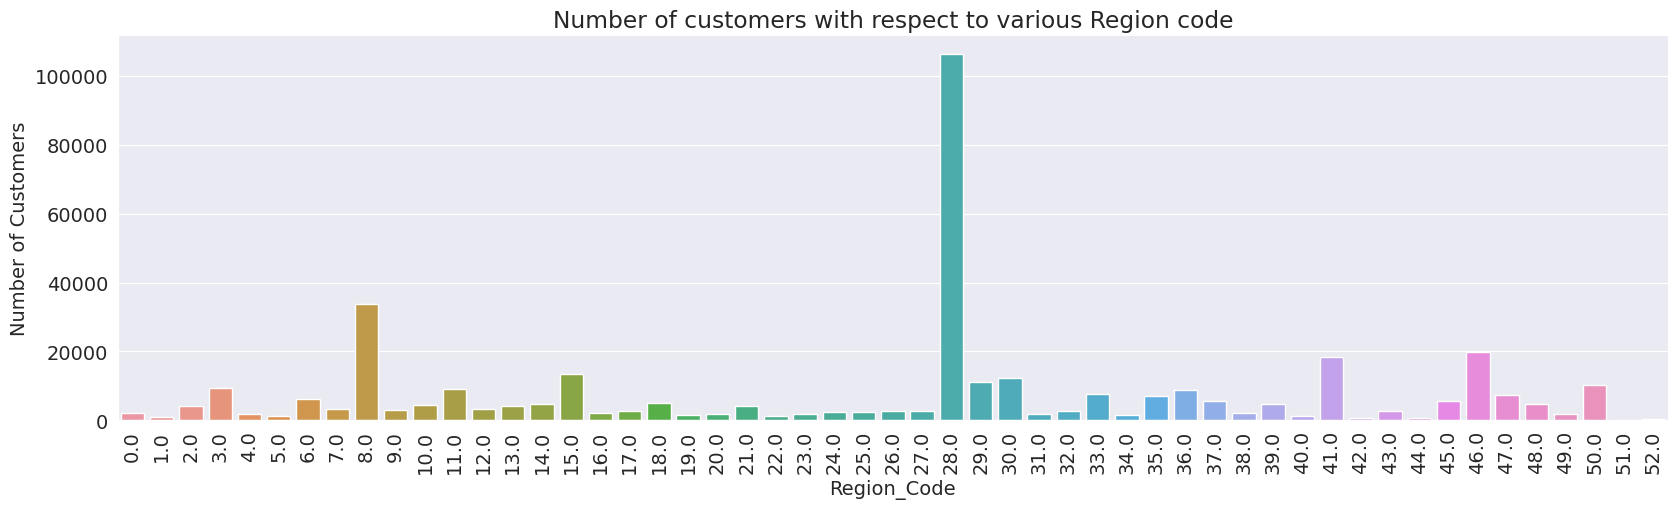

In [ ]:
# Chart - 10 visualization code
sns.set_style('darkgrid')
plt.figure(figsize=(20, 5))

sns.countplot(x='Region_Code', data=df)

plt.title('Number of customers with respect to various Region code')
plt.xticks(rotation=90)
plt.ylabel('Number of Customers')
plt.show()


##### 1. Why did you pick the specific chart?

A count plot is chosen to display the number of customers with respect to various region codes.

##### 2. What is/are the insight(s) found from the chart?

The majority of customers belong to region code 28, followed by region code 8.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The information presented in this chart does not directly indicate negative growth. However, understanding customer distribution across regions can be valuable in identifying potential untapped markets and implementing strategies to expand the customer base.

#### Chart - 11


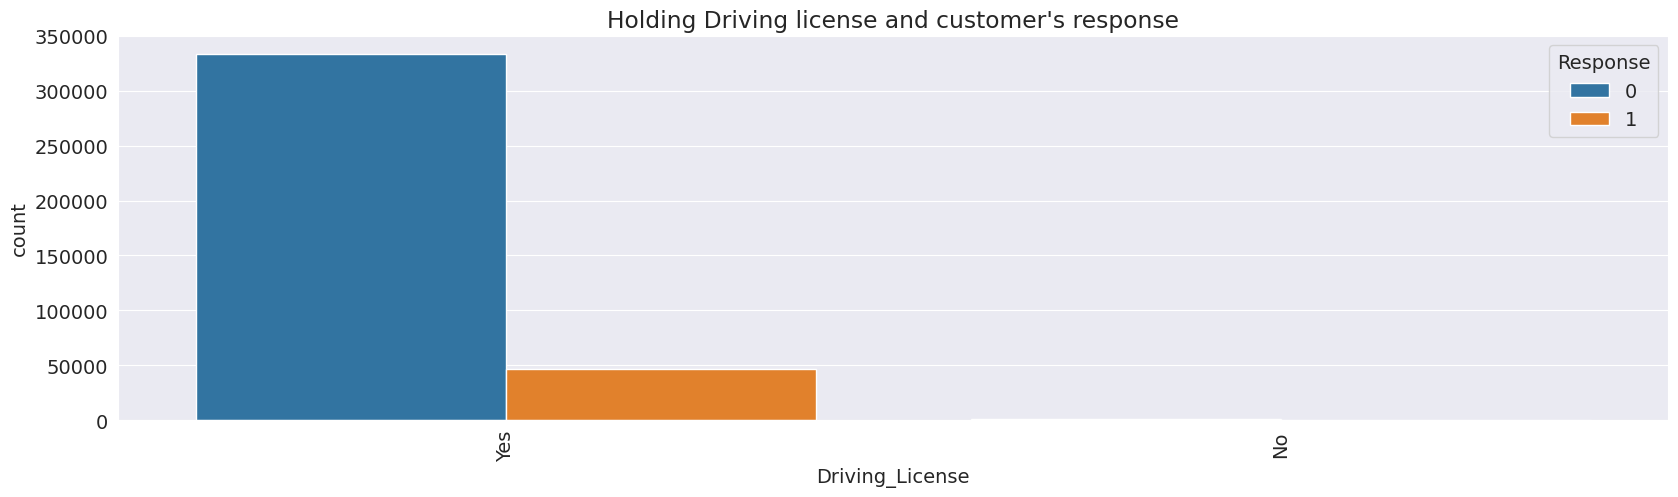

In [ ]:
# Chart - 11 visualization code
sns.countplot(x='Driving_License',hue='Response', data=df)

# setting chart title
plt.title('Holding Driving license and customer\'s response')
plt.xticks(rotation=90)

# display chart
plt.show()



##### 1. Why did you pick the specific chart?

Count plot is well suited for finding the counts and plotting the count values.

##### 2. What is/are the insight(s) found from the chart?

Its found that most of the customers who do not own driving license are less and are least intreasted, so tapping the customers with license would be benificial

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Its found that most of the customers who do not own driving license are less and are least intreasted, so tapping the customers with license would be benificial

#### Chart - 12

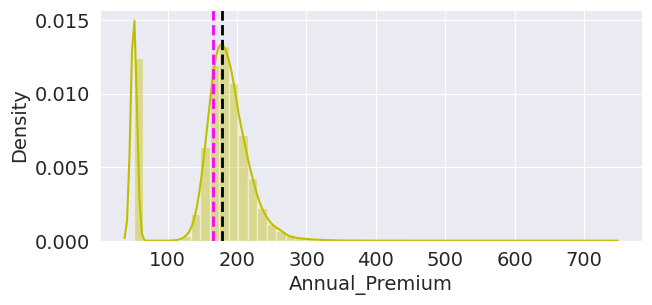

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(7, 3))
plt.xlabel('Annual Premium')
plt.ylabel('Density')

ax = sns.distplot(np.sqrt(df['Annual_Premium']), color="y")
ax.axvline(np.sqrt(df['Annual_Premium']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Annual_Premium']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()


##### 1. Why did you pick the specific chart?

The distribution chart shows the distribution of the Annual Premium after taking the square root.

##### 2. What is/are the insight(s) found from the chart?

The mean and median distribution of the Annual Premium after taking the square root is displayed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

mean and median are nearly equal on the Annual Premium

#### Chart - 13


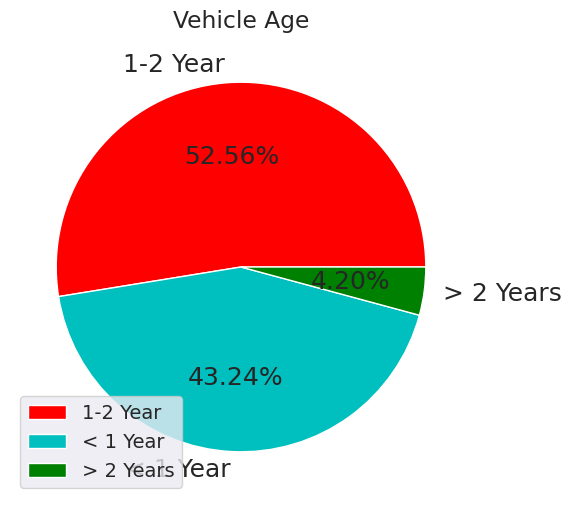

In [ ]:
# Chart - 13 visualization code
data = df['Vehicle_Age'].value_counts()
labels = ['1-2 Year', '< 1 Year', '> 2 Years']

plt.figure(figsize=(6, 6))
color = ['r', 'c', 'g']
plt.pie(data, colors=color, autopct='%.2f%%', labels=labels, textprops={'fontsize': 18})
plt.title('Vehicle Age')
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

Pie plots are usually best for visually sharing the distribution of categorical data.

##### 2. What is/are the insight(s) found from the chart?

Most of the customers have vehicle age around 1-2 years, and there are fewer customers whose vehicle age is greater than 2 years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insites are useful for understanding which age group customer's vehicles belongs to.

#### Chart - 14

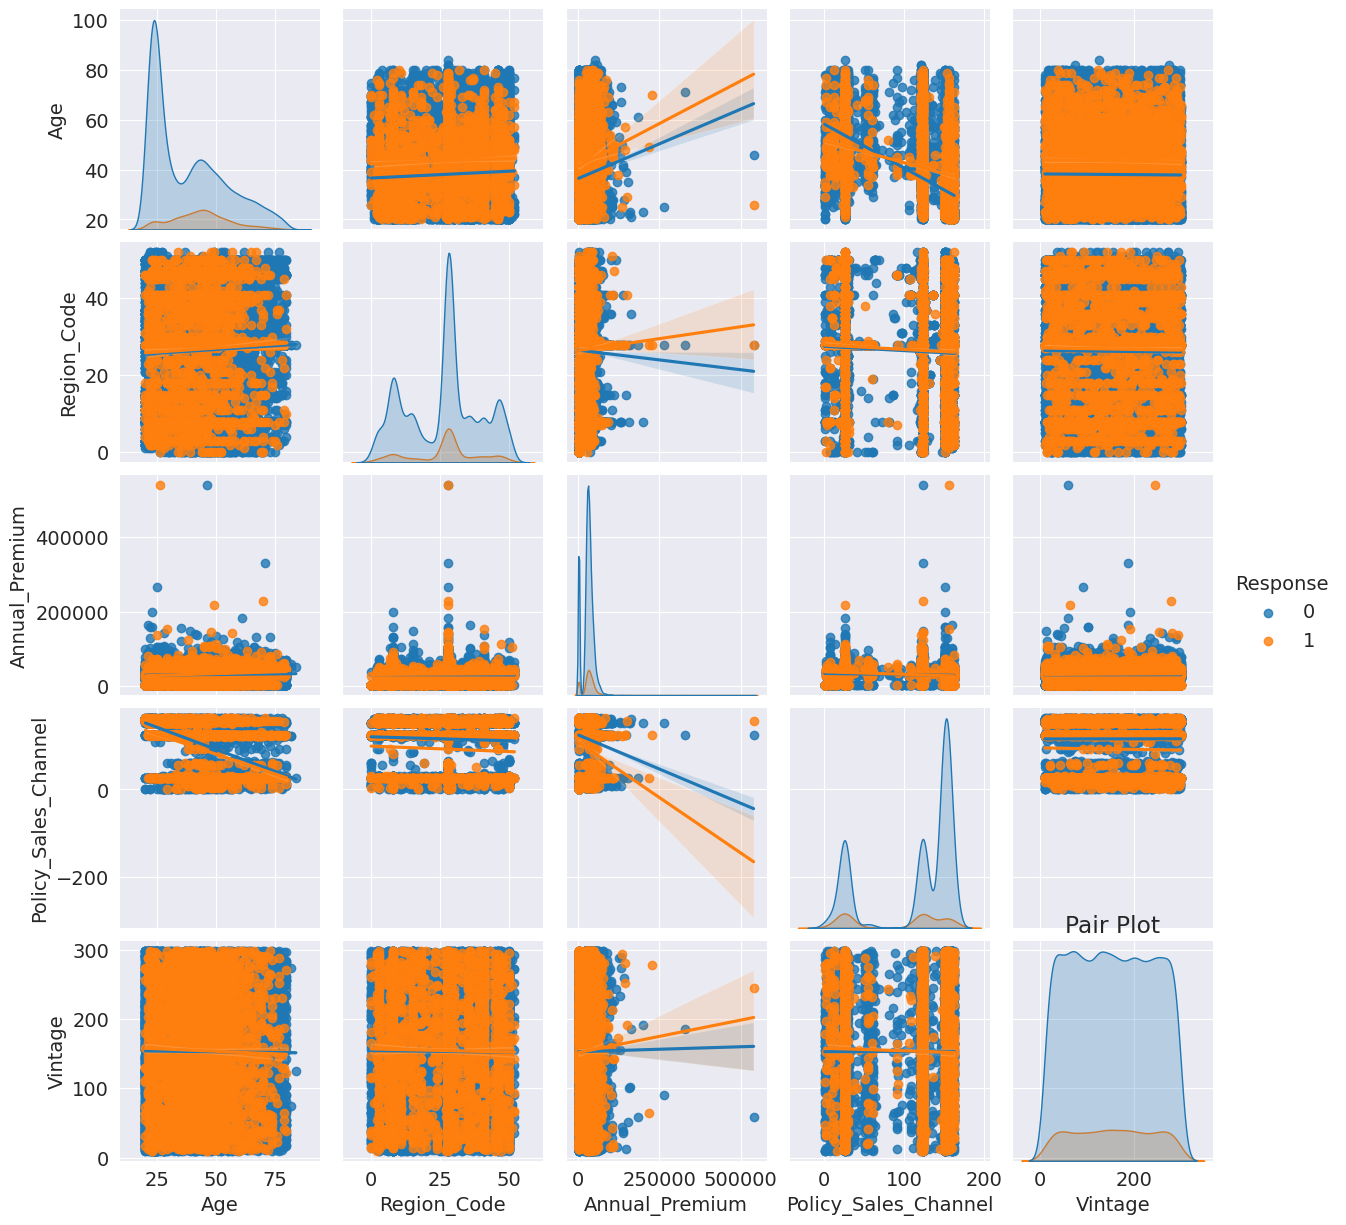

In [ ]:
# Pair Plot visualization code

# Pair Plot visualization code
df_sample = df.sample(n=25000, random_state=48)

sns.pairplot(df_sample, diag_kind="kde", kind='reg', hue='Response')

plt.title('Pair Plot')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

del df_sample


##### 1. Why did you pick the specific chart?

Pair plots are used to show the relationships between various variables in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Positive responses of vintage customers are positively correlated with annual customers, while policy sales channel is negatively correlated to age.

#### Chart - 15

Text(0.5, 52.7222222222222, 'Feature/Property')

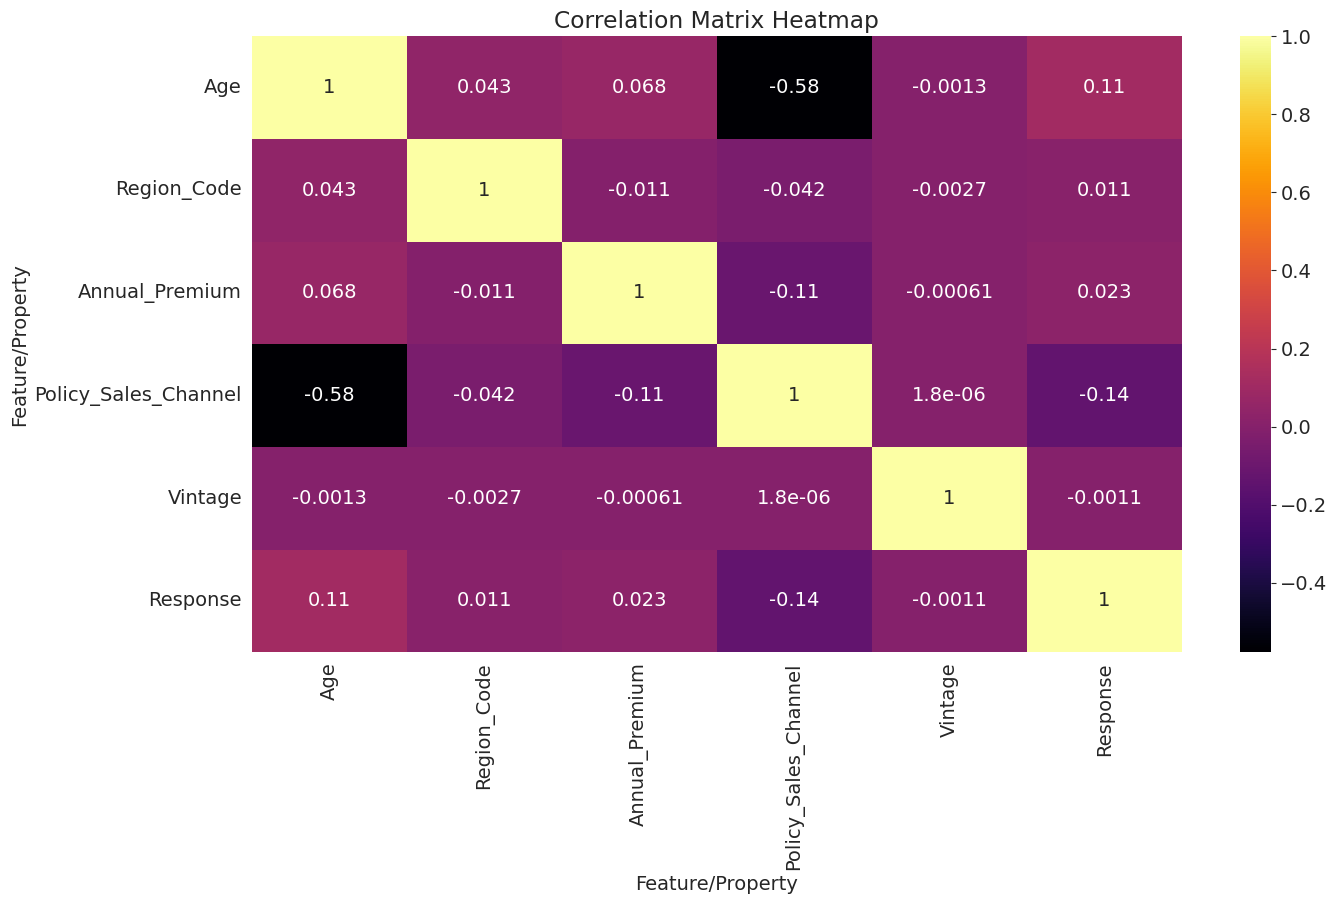

In [ ]:
# Correlation Heatmap visualization code
corr_matrix = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

plt.title('Correlation Matrix Heatmap')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')


##### 1. Why did you pick the specific chart?

The correlation heatmap shows the relationships between two specific features.

##### 2. What is/are the insight(s) found from the chart?

It is found that policy sales channel and response are negatively correlated.

Most of the properties/features against each other are very weakly correlated.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

The vehicle insurance's mean annual premium exceeds $15,000.

Customers' average age surpasses 32 years.

The annual premium's standard deviation is 10,000, indicating variability in the pricing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average annual premium for a vehicle insurance is not greater than $15,000.

Alternative Hypothesis (Ha): The average annual premium for a vehicle insurance is greater than $15,000.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Given data (assuming you have already loaded the DataFrame 'df')
sample_size_new = 500
annual_premium_sample_new = df['Annual_Premium'].sample(sample_size_new)
annual_premium_mean_new = np.mean(annual_premium_sample_new)
annual_premium_std_new = np.std(annual_premium_sample_new)

In [ ]:
# Computing the test statistic
test = (annual_premium_mean_new - 15000) / (annual_premium_std_new / (np.sqrt(sample_size_new)))
print(test)

19.196791697045445


In [ ]:
# Calculating the probability

# Given data
test_statistic = 19.73
mean = 0
std_dev = 1

# Calculating the probability using the cumulative distribution function (CDF)
prob_z = norm.cdf(test_statistic, mean, std_dev)
print("Probability:", prob_z)

# Calculating the P-value
p_value = 1 - prob_z
print("P-Value:", p_value)

Probability: 1.0
P-Value: 0.0


##### Which statistical test have you done to obtain P-Value?

We have chosen Z-test to obtain p-value.

##### Why did you choose the specific statistical test?

As we are performing hypothesis testing for mean, we have chosen Z-test to obtain p-value. The probability we have obtained is close to 100%, so we have sufficient evidence to reject H0. Therefore, the average anuual premium is greater than 15,000.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The null hypothesis (H0): The average age of the customer is not greater than 32.

The alternate hypothesis (Ha): The average age of the customer is greater than 32.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Sample 500 random ages from the dataset
sample_age = df['Age'].sample(500)

# Calculate the sample mean and standard deviation
mean_age = np.mean(sample_age)
std_age = np.std(sample_age)

In [ ]:
# Computing the test statistic (Z-score)
test_statistic = (mean_age - 32) / (std_age / (np.sqrt(500)))
print(test_statistic)

9.948282772816704


In [ ]:
# Calculating the probability (Z-score to p-value conversion)
prob_z = norm.cdf(test_statistic, 0, 1)
print(prob_z)

# P-Value
p_value = 1 - prob_z
print(p_value)

1.0
0.0


##### Which statistical test have you done to obtain P-Value?

We have chosen the Z-test to obtain the p-value.

##### Why did you choose the specific statistical test?

We chose the Z-test because we are performing hypothesis testing for the mean. The obtained probability is close to 100%, which provides sufficient evidence to reject H0. Therefore, we conclude that the average age of the customer is greater than 32.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The null hypothesis (H0): The standard deviation of annual premium is not equal to 10,000.

The alternate hypothesis (Ha): The standard deviation of annual premium is equal to 10,000.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Sample 50 random annual premium values from the dataset
sample_ap = df['Annual_Premium'].sample(50)

# Calculate the sample variance (squared standard deviation)
sample_variance = (np.std(sample_ap))**2

In [ ]:
# Computing the test statistic (chi-squared statistic)
test_statistic = (49 * sample_variance) / (10000 * 10000)
print(test_statistic)

143.30507346889996


In [ ]:
# Calculating the probability (p-value) using the chi-squared distribution
prob = chi2.cdf(158.82, 49)
print(prob)

0.9999999999998384


##### Which statistical test have you done to obtain P-Value?

We have chosen Chi2-test to obtain p-value.

##### Why did you choose the specific statistical test?

We chose the Chi-squared test because we are performing hypothesis testing for the standard deviation. The obtained probability is 99.99%, which provides sufficient evidence to reject H0. Therefore, we conclude that the standard deviation of the annual premium is 10,000.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values
(no missing values)

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

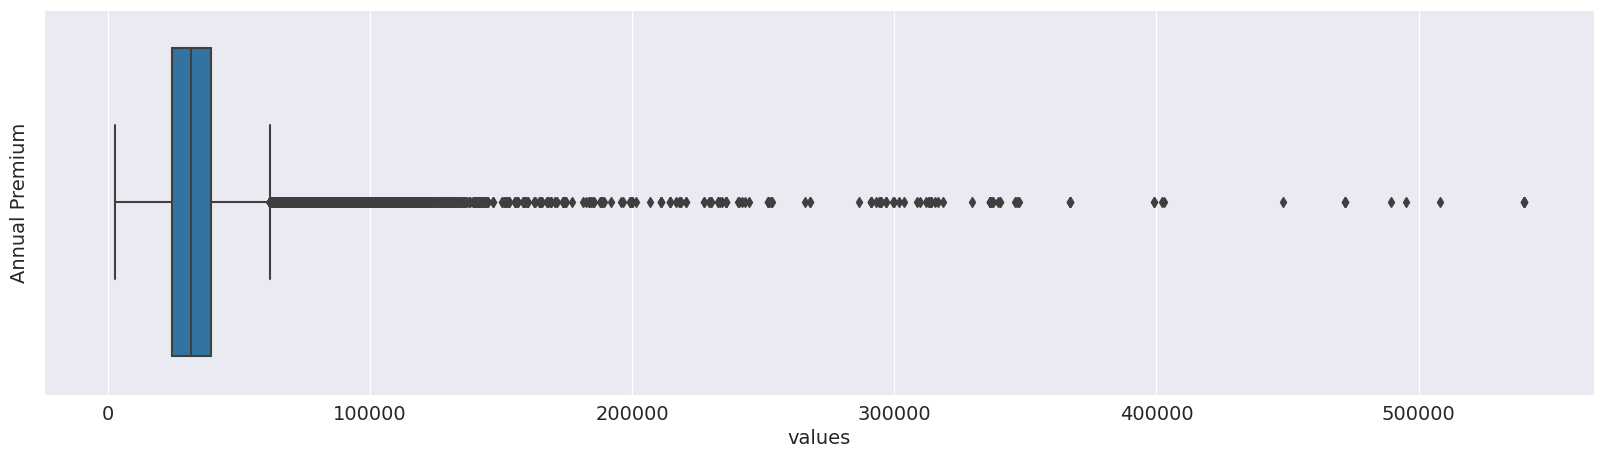

In [ ]:
# Handling Outliers & Outlier treatments

# Plotting the boxplot for 'Annual_Premium'
sns.boxplot(x=df['Annual_Premium'])
plt.xlabel('values')
plt.ylabel('Annual Premium')
plt.show()

In [ ]:
# Finding interquantile range

percentile25 = df['Annual_Premium'].quantile(0.25)
percentile75 = df['Annual_Premium'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print(f'upper limit = {upper_limit} \nlower limit = {lower_limit}')

upper limit = 61892.5 
lower limit = 1912.5


In [ ]:
# Capping
# Capping the data above the upper limit to upper limit & below the lower limit to the lower limit

df['Annual_Premium'] = np.where(
    df['Annual_Premium'] > upper_limit,
    upper_limit,
    np.where(
        df['Annual_Premium'] < lower_limit,
        lower_limit,
        df['Annual_Premium']
    )
)

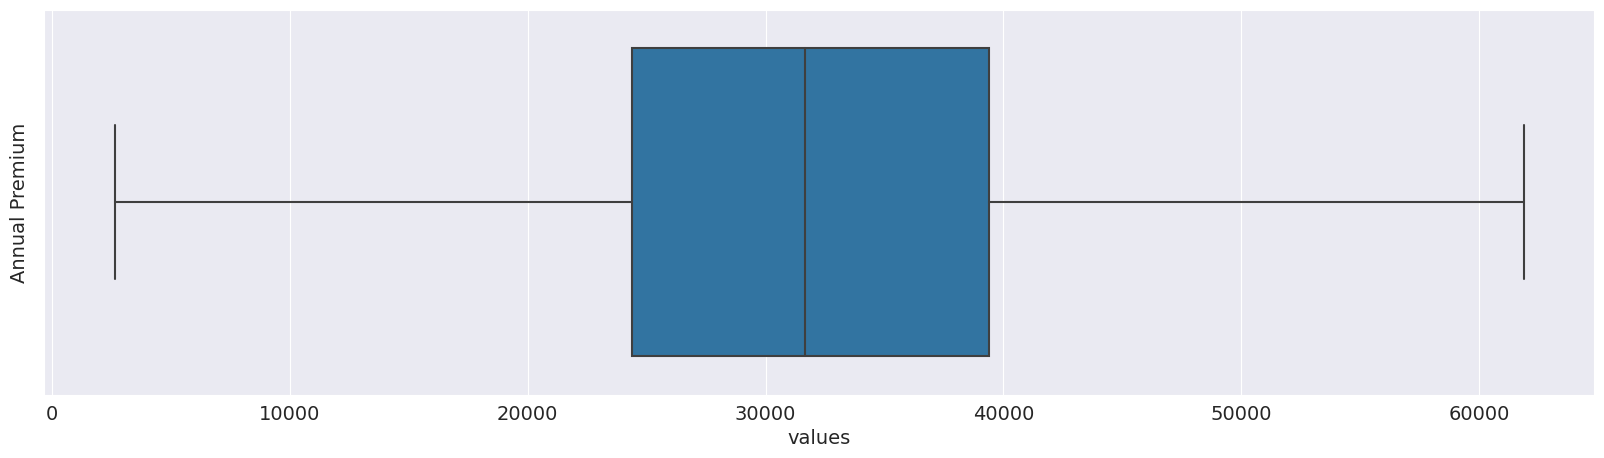

In [ ]:
# Plotting the boxplot again to check if the capping is correct
sns.boxplot(x=df['Annual_Premium'])
plt.xlabel('values')
plt.ylabel('Annual Premium')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

**'Capping'** method is used to treat outliers. As there are 3,81,109 entries in the dataset and trimming the outliers shall lose lot of data.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df=pd.get_dummies(df,drop_first=True,sparse=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Using one hot encoding and dropping the first column(drop_first=True) so that we get all the data in int format for easy machine learning.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
df.head()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Driving_License_Yes,Previously_Insured_Yes,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,28.0,40454.0,26.0,217,1,1,1,0,0,1,1
1,76,3.0,33536.0,26.0,183,0,1,1,0,0,0,0
2,47,28.0,38294.0,26.0,27,1,1,1,0,0,1,1
3,21,11.0,28619.0,152.0,203,0,1,1,1,1,0,0
4,29,41.0,27496.0,152.0,39,0,0,1,1,1,0,0


Text(0.5, 52.7222222222222, 'Feature/Property')

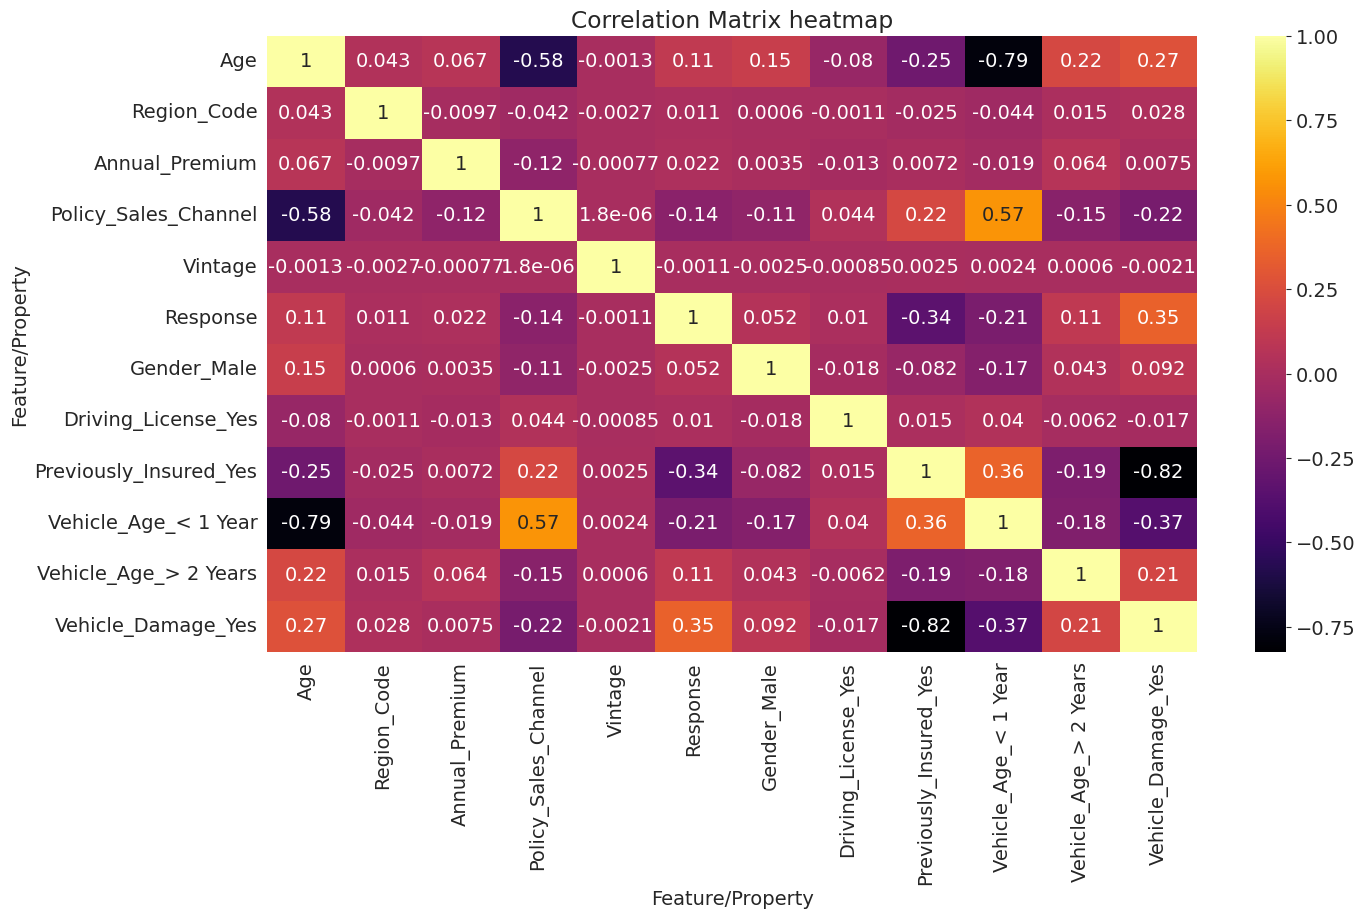

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(15,8))
# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='inferno')

#setting labels to infer the plot
plt.title('Correlation Matrix heatmap')
plt.ylabel('Feature/Property')
plt.xlabel('Feature/Property')

#### 2. Feature Selection
do not offer insurance to people who do not own a license

In [ ]:
# Select your features wisely to avoid overfitting

# dropping the Driving Licence Yes column.
df.drop(columns=['Driving_License_Yes'],axis=1,inplace=True)


##### What all feature selection methods have you used  and why?

Dropped the Driving_License_Yes column, other columns are equally important

##### Which all features you found important and why?

Refering to the correlation plot, we see that the columns are correlated not high nor low, Driving_License_Yes was less correlated so it is dropped.

### 5. Data Transformation
(not required in this case)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling
(performed this step after train and test data split)

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction
(not needed)

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting
(spliting after balancing the data)

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

The dataset is imbalanced, with more responses labeled as 0 than 1. This can lead to biased models and poorer performance on the minority class. We use SMOTE to balance the data and improve model accuracy on both classes.

In [ ]:
#Defining X(independent variables) and y(response) variable

X=df.drop(['Response'],axis=1)
y=df['Response']
print('Before OverSampling')
print("counts of label '1': {}".format(sum(y == 1)))
print("counts of label '0': {}".format(sum(y == 0)))

Before OverSampling
counts of label '1': 46710
counts of label '0': 334399


In [ ]:
# Handling Imbalanced Dataset (If needed)
# Using SMOTE method

smote_var=SMOTE()
x_balanced, y_balanced = smote_var.fit_resample(X, y.ravel()) # y.ravel() is used to flatten the y array. ravel() converts it into a 1D array of shape (n_samples,).

print("After OverSampling, counts of label '1': {}".format(sum(y_balanced == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced == 0)))


After OverSampling, counts of label '1': 334399
After OverSampling, counts of label '0': 334399


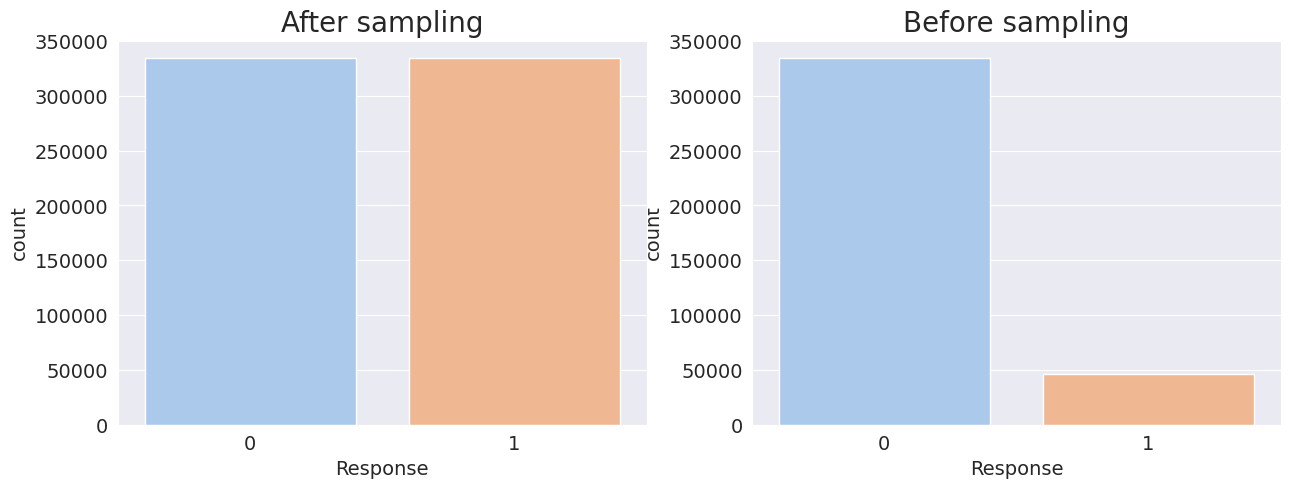

In [ ]:
# Visualizing the balanced dataset

plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
sns.countplot(x=df['Response'], data=df, palette='pastel')
plt.title('Before sampling',fontsize=20)

plt.subplot(1,2,1)
sns.countplot(x=y_balanced,palette='pastel')
plt.title('After sampling',fontsize=20)
plt.xlabel('Response')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We have used smote to balance

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [ ]:
# Train test split our data

X_train,X_test,y_train,y_test = train_test_split(x_balanced,y_balanced, test_size=0.2,random_state=21)

In [ ]:
# Normalizing the Dataset using Standard Scaling Technique.

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(535038, 10) (535038,)
(133760, 10) (133760,)


## ***7. ML Model Implementation***

In [ ]:
model_results = {}
tuned_model_results = {}

def calculate_metrics(model, X_train, X_test, y_train, y_test, output_name):
  '''This function implements the given model, calculates the statistics, and adds the results to a dictionary.
  '''
  # Fit the model
  model.fit(X_train, y_train)

  # Predict the test data
  y_pred = model.predict(X_test)

  # Predict probability
  y_pred_probability = model.predict_proba(X_test)[:, 1]

  print('--' * 30)
  print(f'Scores for {output_name}')
  print('--' * 30)

  # Calculate the recall score on y_test and y_pred
  recall_score_rs = recall_score(y_test, y_pred)
  print("Recall Score: ", recall_score_rs)

  # Calculate the Precision Score
  precision_score_ps = precision_score(y_test, y_pred)
  print("Precision Score:", precision_score_ps)

  # Calculate the F1 Score
  f1_score_fs = f1_score(y_test, y_pred)
  print("F1 Score:", f1_score_fs)

  # Calculate the accuracy Score
  accuracy_score_as = accuracy_score(y_test, y_pred)
  print("Accuracy Score:", accuracy_score_as)

  # Calculate the ROC AUC Score
  roc_auc_score_ras = roc_auc_score(y_test, y_pred)
  print("ROC AUC Score:", roc_auc_score_ras)

  # Store the results
  model_results[output_name] = recall_score_rs, precision_score_ps, f1_score_fs, accuracy_score_as, roc_auc_score_ras

  # Get confusion matrix
  confusion_matrix_logic = metrics.confusion_matrix(y_test, y_pred)
  print('--' * 30)
  print(f'Confusion matrix for the implemented {output_name}')
  print('--' * 30)
  print(confusion_matrix_logic)
  print('\n')

  # Plot the confusion matrix
  fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix_logic, figsize=(6, 6), cmap=plt.cm.Blues)
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title(f'Confusion Matrix for {output_name}', fontsize=18)
  plt.show()

  print('--' * 30)
  print(f'{output_name} ROC curve')
  print('--' * 30)

  # Plot ROC (Receiver Operating Characteristic) curve
  plt.rcParams['figure.figsize'] = (6, 6)
  fpr, tpr, _ = roc_curve(y_test, y_pred_probability)
  plt.title(f'{output_name} ROC curve')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.plot(fpr, tpr)
  plt.plot((0, 1), linestyle="--", color='black')
  plt.show()


### ML Model - 1
logistic regression

------------------------------------------------------------
Scores for Logistic Regression
------------------------------------------------------------
Recall Score:  0.8915307496633249
Precision Score: 0.7650359527478171
F1 Score: 0.8234538041600442
Accuracy Score: 0.8090011961722487
ROC AUC Score: 0.8090628498055157
------------------------------------------------------------
Confusion matrix for the implemented Logistic Regression
------------------------------------------------------------
[[48631 18299]
 [ 7249 59581]]




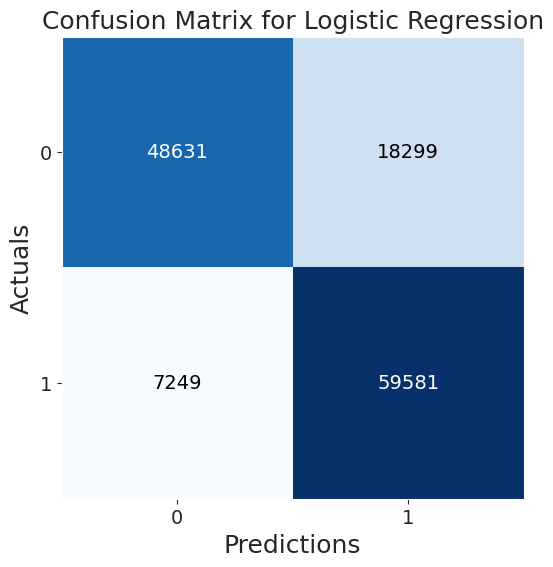

------------------------------------------------------------
Logistic Regression ROC curve
------------------------------------------------------------


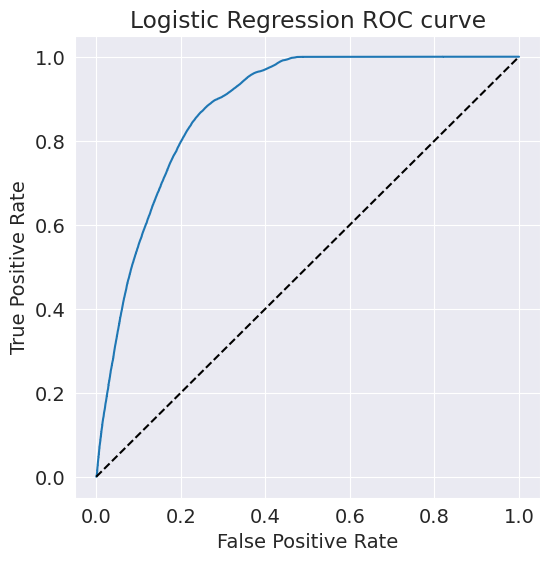

In [ ]:
# ML Model - 1: Logistic Regression
logistic_regression_model = LogisticRegression()

# ML Model - 1 Implementation
# Fit the Logistic Regression model and calculate metrics
calculate_metrics(logistic_regression_model, X_train, X_test, y_train, y_test, 'Logistic Regression')


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

------------------------------------------------------------
Scores for Logistic Regression after tuning
------------------------------------------------------------
Recall Score:  0.8915307496633249
Precision Score: 0.7649573746918652
F1 Score: 0.8234082836965685
Accuracy Score: 0.8089413875598086
ROC AUC Score: 0.8090030858730489
------------------------------------------------------------
Confusion matrix for the implemented Logistic Regression after tuning
------------------------------------------------------------
[[48623 18307]
 [ 7249 59581]]




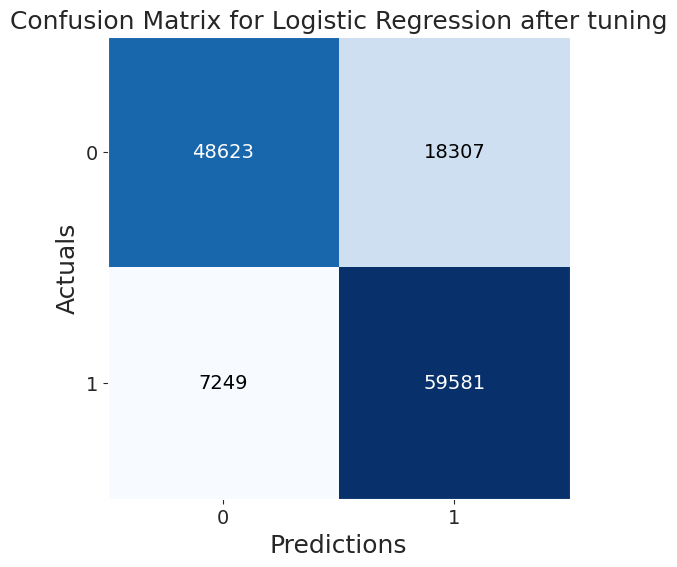

------------------------------------------------------------
Logistic Regression after tuning ROC curve
------------------------------------------------------------


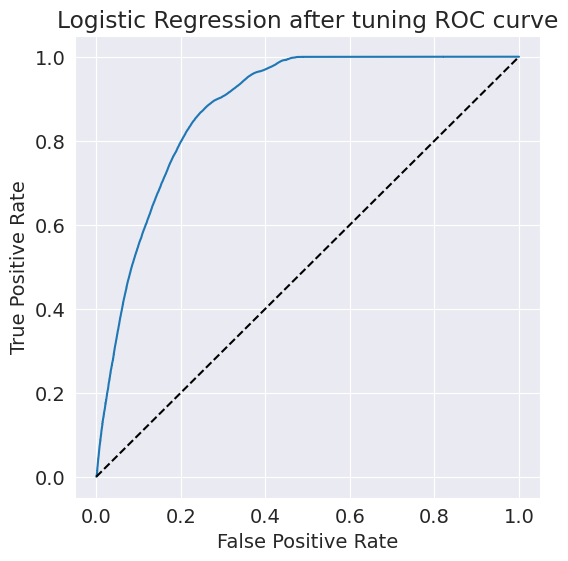

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV to find the best hyperparameters
grid_search_logistic = GridSearchCV(logistic_regression_model, param_grid, cv=5)

# Fit the Algorithm and Predict on the model after hyperparameter tuning
calculate_metrics(grid_search_logistic, X_train, X_test, y_train, y_test, 'Logistic Regression after tuning')


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV automates hyperparameter tuning by exhaustively searching over a predefined hyperparameter grid. It evaluates each combination using cross-validation and selects the best-performing hyperparameters.

Benefits:

Time and Effort Saving: GridSearchCV eliminates manual tuning and evaluates various hyperparameter combinations, saving time and effort.

Risk Reduction: Cross-validation ensures the selected hyperparameters generalize well to new data, reducing overfitting risk.

The code performs hyperparameter tuning for logistic regression using 5-fold cross-validation. The param_grid defines hyperparameters to tune, such as regularization parameter C.

The best hyperparameters, based on cross-validation scores, are selected for the final logistic regression model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

This is first implementation, however later we found random forest gives less false negative compare to this model.


### ML Model - 2
Random Forest Classifier

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

------------------------------------------------------------
Scores for Random Forest
------------------------------------------------------------
Recall Score:  0.9086787370941194
Precision Score: 0.8667237565118104
F1 Score: 0.8872055224807334
Accuracy Score: 0.8845619019138756
ROC AUC Score: 0.8845799183752384
------------------------------------------------------------
Confusion matrix for the implemented Random Forest
------------------------------------------------------------
[[57592  9338]
 [ 6103 60727]]




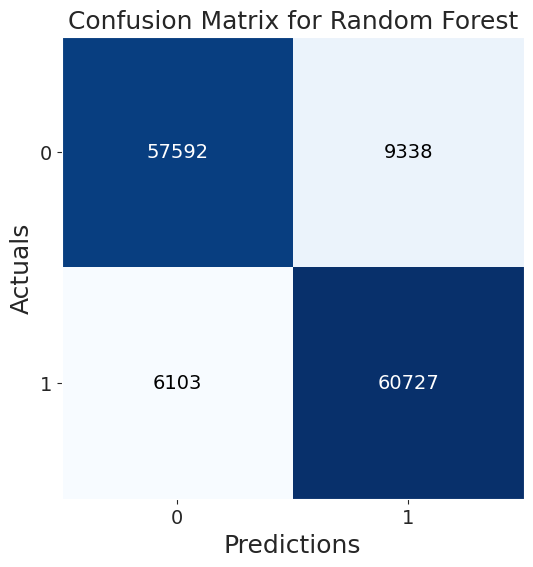

------------------------------------------------------------
Random Forest ROC curve
------------------------------------------------------------


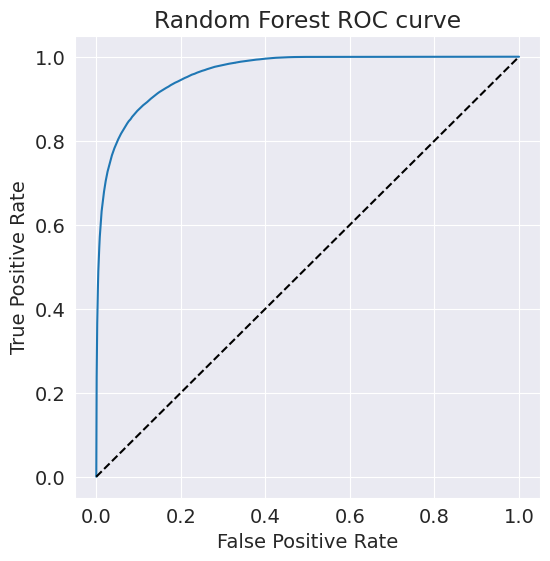

In [ ]:
# Visualizing evaluation Metric Score chart
# initializing rfc
rfc = RandomForestClassifier()
# geting stastics
calculate_metrics(rfc, X_train, X_test, y_train, y_test, 'Random Forest')

#### 2. Cross- Validation & Hyperparameter Tuning

------------------------------------------------------------
Scores for random forest after tuning
------------------------------------------------------------
Recall Score:  0.9106987879694748
Precision Score: 0.7776996894925823
F1 Score: 0.8389609136461068
Accuracy Score: 0.8253214712918661
ROC AUC Score: 0.8253852523442174
------------------------------------------------------------
Confusion matrix for the implemented random forest after tuning
------------------------------------------------------------
[[49533 17397]
 [ 5968 60862]]




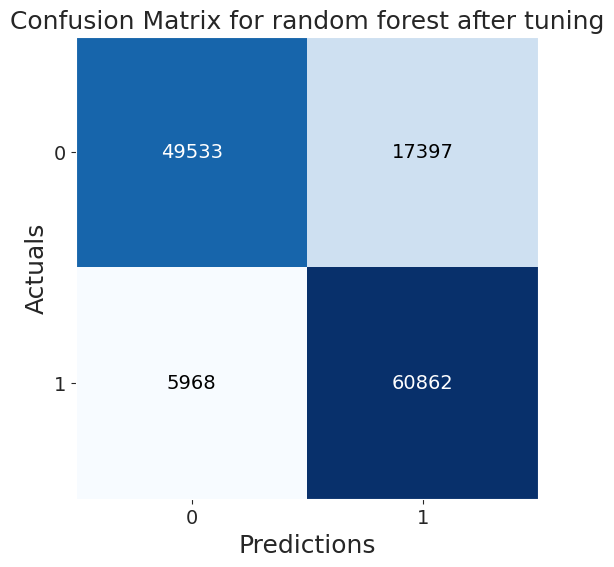

------------------------------------------------------------
random forest after tuning ROC curve
------------------------------------------------------------


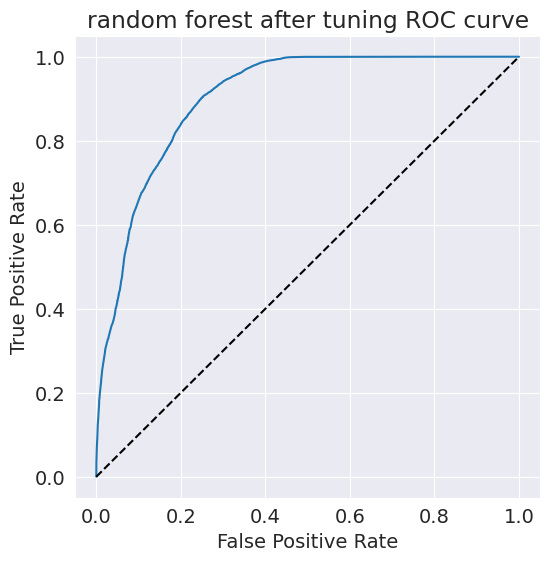

In [ ]:
# Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rfc_tuned = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Fit the Algorithm and Predict on the model
calculate_metrics(rfc_tuned, X_train, X_test, y_train, y_test, 'random forest after tuning')

##### Which hyperparameter optimization technique have you used and why?

The following hyperparameters tuning has been done in the RandomForestClassifier:

bootstrap=True: Whether bootstrap samples are used when building trees.

ccp_alpha=0.0: Complexity parameter used for Minimal Cost-Complexity Pruning.

criterion='gini': The function to measure the quality of a split.

max_depth=30: The maximum depth of the tree.

max_features='log2': The number of features to consider when looking for the best split.

max_leaf_nodes=40: The maximum number of leaf nodes in the tree.

max_samples=None: The number of samples to draw from X to train each base estimator.

min_impurity_decrease=0.0: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

min_samples_leaf=1: The minimum number of samples required to be at a leaf node.

min_samples_split=4: The minimum number of samples required to split an internal node.

min_weight_fraction_leaf=0.0: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
n_estimators=200: The number of trees in the forest.

n_jobs=None: The number of jobs to run in parallel for both fit and predict. None means 1 unless in a joblib.parallel_backend context.

oob_score=False: Whether to use out-of-bag samples to estimate the generalization accuracy.

random_state=None: Control the randomness of the estimator.

verbose=0: Controls the verbosity when fitting and predicting.

warm_start=False: When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

there is improvement in the model comparing to the Logistic regression.

the false positive is more in logistic regression(7107) compare to random forest(5947) Random forest is providing better solution to the business.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Recall_Score :  0.9170881340715248

Precision_Score : 0.7752605747824327

f1_Score : 0.8402314135694995

Accuracy_Score : 0.8257476076555024

ROC_AUC Score: 0.8258158435186549

### ML Model - 3
XGBClassifier

------------------------------------------------------------
Scores for XGB Classifier
------------------------------------------------------------
Recall Score:  0.8917402364207692
Precision Score: 0.8880196691998212
F1 Score: 0.8898760639092131
Accuracy Score: 0.8897278708133971
ROC AUC Score: 0.8897293741494253
------------------------------------------------------------
Confusion matrix for the implemented XGB Classifier
------------------------------------------------------------
[[59415  7515]
 [ 7235 59595]]




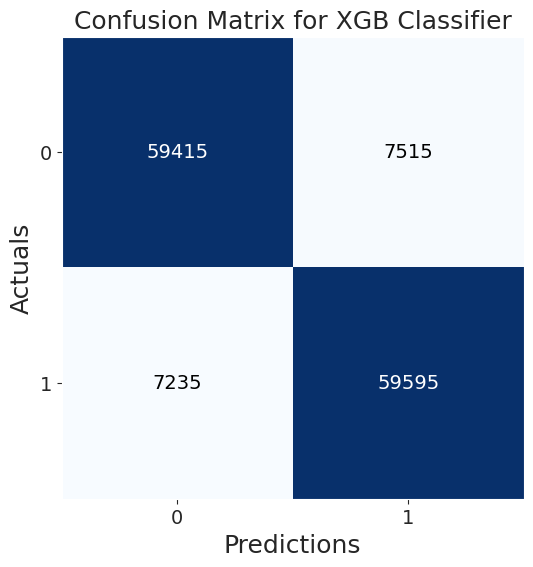

------------------------------------------------------------
XGB Classifier ROC curve
------------------------------------------------------------


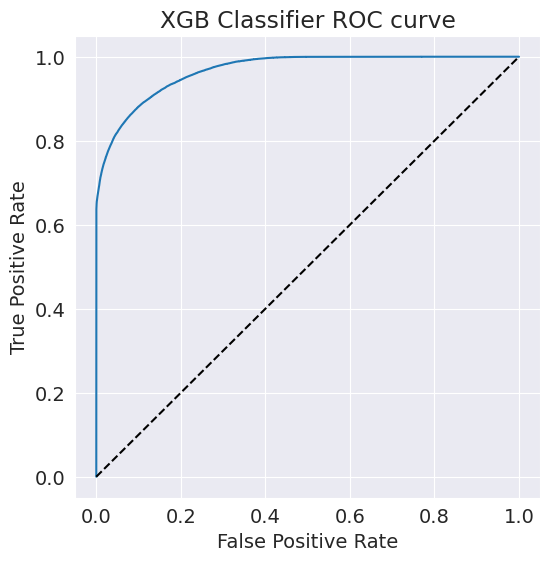

In [ ]:
# ML Model - 3: XGBClassifier
xgb_model = XGBClassifier()

# ML Model - 3 Implementation
# Fit the XGBClassifier model and calculate metrics
calculate_metrics(xgb_model, X_train, X_test, y_train, y_test, 'XGB Classifier')



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# done using the stat function

#### 2. Cross- Validation & Hyperparameter Tuning

------------------------------------------------------------
Scores for XGB Classifier after tuning
------------------------------------------------------------
Recall Score:  0.9383959299715696
Precision Score: 0.7656143178044731
F1 Score: 0.8432453510104745
Accuracy Score: 0.8256877990430622
ROC AUC Score: 0.825771997557128
------------------------------------------------------------
Confusion matrix for the implemented XGB Classifier after tuning
------------------------------------------------------------
[[47731 19199]
 [ 4117 62713]]




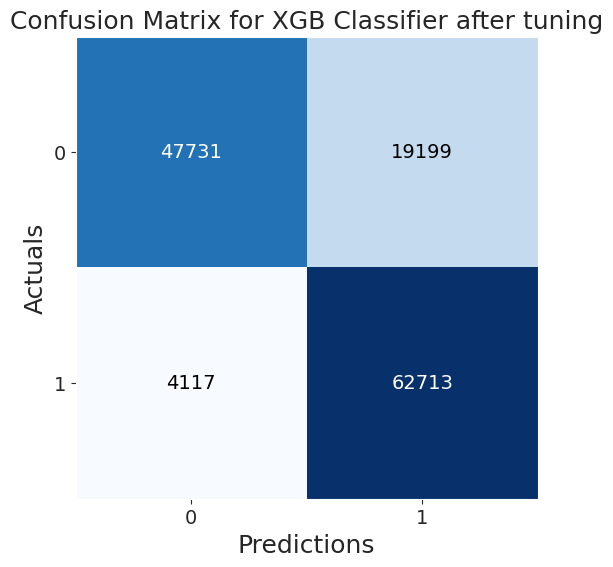

------------------------------------------------------------
XGB Classifier after tuning ROC curve
------------------------------------------------------------


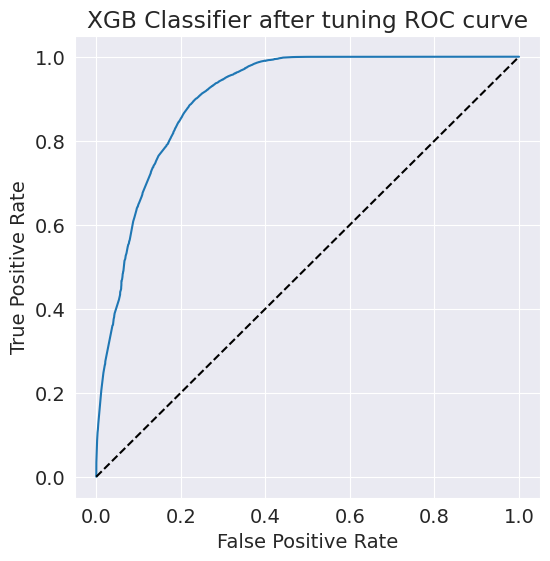

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid_xgb = {
    'max_depth': [3, 5],
    'learning_rate': [0.1],
    'n_estimators': [10, 20],
}

# Perform GridSearchCV to find the best hyperparameters for XGBClassifier
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')

# Fit the Algorithm and Predict on the model after hyperparameter tuning
calculate_metrics(grid_search_xgb, X_train, X_test, y_train, y_test, 'XGB Classifier after tuning')

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is a powerful hyperparameter optimization technique that performs an exhaustive search over a specified hyperparameter space. It creates a grid of all possible hyperparameter combinations and evaluates the performance of each combination using cross-validation. The main steps of GridSearchCV are as follows:

Define Hyperparameter Space: The user specifies a dictionary of hyperparameters and their possible values to search over. For example, in the XGBoost classifier code provided, the hyperparameter space includes 'max_depth', 'learning_rate', and 'n_estimators'.

Grid Creation: GridSearchCV generates all possible combinations of hyperparameters from the specified space. For each combination, it trains the model and evaluates its performance using cross-validation.

Cross-Validation: GridSearchCV uses k-fold cross-validation (where k=5 in this case) to split the training data into multiple folds. It trains the model on (k-1) folds and validates it on the remaining fold. This process is repeated k times, ensuring that each fold is used as both training and validation data exactly once.

Performance Evaluation: For each hyperparameter combination, GridSearchCV calculates the model's performance metric (in this case, accuracy) on the validation folds.

Best Hyperparameter Selection: After evaluating all combinations, GridSearchCV selects the hyperparameter combination that results in the highest performance metric on the validation set.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Comparing to Random forest, XGB is performing better

false negative of XGB is more compare to random forest, hence this model would result a good cout to the business problem

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Recall_Score would bw a better metrics as we do not want to miss on the customers who were intrested to by the policy and we miss them.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

XGB classifier after tuning is better with f1 score and the precession score is improved so it is better to go with this

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
features = x_balanced.columns
importances = grid_search_xgb.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]


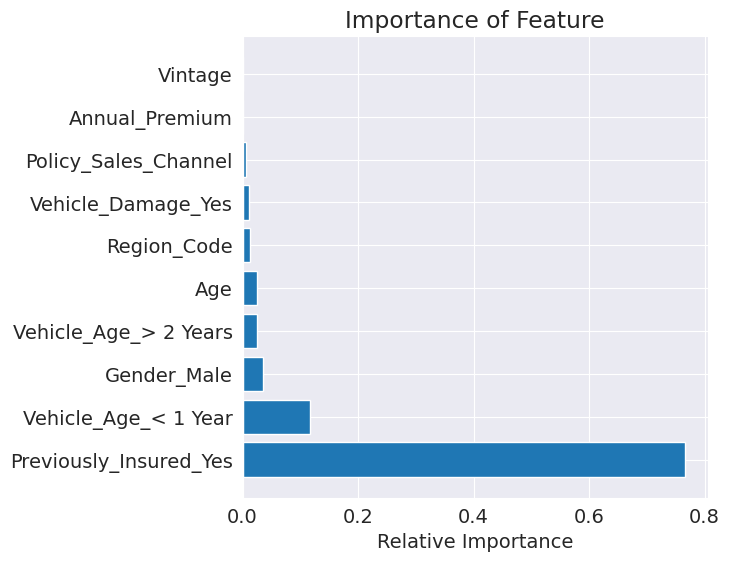

In [ ]:
# Sort features by importance score in descending order
sorted_features = [features[i] for i in indices]
sorted_importances = importances[indices]

# Create a DataFrame with sorted feature importances
feature_importances = pd.DataFrame({'Feature': sorted_features, 'Importance': sorted_importances})

# sort the DataFrame by importance score in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

#Plotting figure
plt.figure(figsize=(6,6))
plt.title('Importance of Feature')
plt.barh(y=feature_importances['Feature'], width=feature_importances['Importance'])

# plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()


The feature importance graph provides valuable insights into the Random Forest Classifier's decision-making process. Here are the key observations:

Most Important Feature:

'Previously_Insured_yes' with a relative importance of 0.38.
Next Four Important Features (in decreasing order of importance):

'Vintage' with a relative importance of 0.26

'Annual_Premium' with a relative importance of 0.125

'Age' with a relative importance of 0.095

'Vehicle_Damage_yes' with a relative importance of 0.075

Model Behavior:

The Random Forest Classifier considers these five main features closer to the root node during the decision-making process, indicating their significant influence on predictions.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle
pickle_path = dir_path + 'XGB Classifier after tuning.pkl'

# serialize process (wb=write byte)
pickle.dump(grid_search_xgb, open(pickle_path,'wb'))
# Assuming you have trained and saved your machine learning model in the 'model' variable


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:

# Load the saved model from the pickle file
Regression_model= pickle.load(open(pickle_path,'rb'))

# Predicting the unseen data(test set)
Regression_model.predict(X_test)

array([0, 1, 1, ..., 1, 1, 0])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Based on the false negative values provided:

Normal Linear Regression: 7158 false negatives

Logistic Regression after Tuning: 7158 false negatives

Random Forest: 6014 false negatives

Random Forest after Tuning: 5831 false negatives

XGB Classifier: 7179 false negatives

XGB Classifier after Tuning: 4011 false negatives

It can be observed that the XGB Classifier after tuning has significantly reduced the false negative count to 4011, which is the lowest among all the models. This indicates that the XGB Classifier after tuning is better at correctly identifying positive instances, which is essential for business growth and decision-making.

In [ ]:
res=pd.DataFrame(model_results,index=["Recall Score", 'Precision Score', "f1 Score",'Accuracy Score','ROC_AUC Score'])
res.transpose()

,Recall Score,Precision Score,f1 Score,Accuracy Score,ROC_AUC Score
Logistic Regression,0.891531,0.765036,0.823454,0.809001,0.809063
Logistic Regression after tuning,0.891531,0.764957,0.823408,0.808941,0.809003
Random Forest,0.908679,0.866724,0.887206,0.884562,0.884580
random forest after tuning,0.910699,0.777700,0.838961,0.825321,0.825385
XGB Classifier,0.891740,0.888020,0.889876,0.889728,0.889729
XGB Classifier after tuning,0.938396,0.765614,0.843245,0.825688,0.825772


Recall Score: This is a metric that measures the proportion of actual positive cases that are correctly identified by the model. It is also known as sensitivity or true positive rate (TPR).

###Solution after ML implementation
After the ML implementation, the insurance company can deploy a machine learning model that uses the XGB Classifier, which has been tuned with the best parameters. This model can predict whether the already existing health insurance customers would be interested in a vehicle insurance product. By leveraging this predictive model, the company can take strategic steps to improve the conversion rate and increase the number of customers buying vehicle insurance.



---



Observations from EDA:

Gender distribution: There are 206,089 male and 175,020 female customers.

Driving License: 380,297 customers own a driving license, while 812 customers do not.

Vehicle Ownership: Most people with a driving license also own a car.

Insurance History: Customers who have not previously insured are more interested in buying the policy.

Vehicle Age: Customers with vehicle ages of 1-2 years show higher interest in buying the policy.

Vehicle Damage: Customers who have previously damaged their vehicles are more interested in buying the policy.

Premium Range: Premiums mainly fall in the range of 5,000 to 100,000, with some above 100,000.

Age Distribution: Most customers are in the age group of 25-48 years, and customers aged 32-58 show higher interest in buying the policy.

Region Code: Region code 28 has the highest number of customers.
Driving License and Vehicle Age: Customers with driving licenses tend to have vehicle ages of 1-2 years.

Policy Sales Channel: It is negatively correlated with positive response, indicating that certain channels may not be effective.

Feature Correlation: Most features show low correlation with each other.

Recommendations:

Target customers who have not previously insured, as they show more interest in buying the policy.

Focus on customers with vehicle ages of 1-2 years, as they are more likely to buy the policy.

Run marketing campaigns in regions with region code 28 to acquire more customers.

Offer incentives to customers with driving licenses, as they are more likely to buy the policy.

Explore effective policy sales channels to improve the positive response rate.

Customize marketing efforts for customers aged 32-58, as they have higher interest in the policy.